## Preparation of the LibriSpeech Dataset for the use with Google-Drive and Google-Colab

In [1]:
import pandas as pd
import os
from tqdm import tqdm
import plotly.express as px
import plotly.io as pio
from IPython.display import Image

### Mount your google-drive

In [2]:
from google.colab import drive, files
drive.mount('/content/drive', force_remount=True)
DATA_PATH = '/content/drive/MyDrive/LibriSpeech/'
#DATA_PATH = "G:/Meine Ablage/LibriSpeech/"

### Download and untar the 360-hours LibtriSpeech dataset directly to google-drive

In [ ]:
!wget https://openslr.elda.org/resources/12/train-clean-360.tar.gz -P '/content/drive/MyDrive/' 

In [ ]:
!tar -xzvf "/content/drive/MyDrive/train-clean-360.tar.gz" -C "/content/drive/MyDrive/"

### Make dataframe and calculate duration and char_length

The audio samples from different books are separated in different folders. Each folder contains also a text-file with a transcriptions for each sample.

In [ ]:
fname = []
# walk all subfolders in the main folder and find files with txt-extension (transcriptions)
for root, dirs, files in tqdm(os.walk("/content/drive/MyDrive/LibriSpeech/train-clean-360")):
   for file in files:
       if file.endswith(".txt"):
           fname.append(os.path.join(root, file).replace("\\", "/")+" "+root.replace("\\", "/")+"/")
# write all txt-file-paths to a new file
outfile = open("/content/drive/MyDrive/LibriSpeech/path_list_train360-txt.txt", 'w')
for element in fname:
   outfile.write(element+ "\n")
outfile.close()

In [ ]:
fp = open(DATA_PATH+"path_list_train360-txt.txt", "r")
file_list = fp.readlines()
# copy the content of all txt-files to metadata.csv and generate file-paths for all audio-files
with open(DATA_PATH+"metadata.csv", "a") as meta_data:
   for line in file_list:
       filepath = line.split(" ")[0] # filepath not path
       path = line.split(" ")[1] # path not filepath
       path = path.replace("\n", "") # get rid of linebreaks
       f = open(filepath)
       for line in f.readlines():
           line = line.replace(" ", "|", 1).lower() # replace first whitespace with "|" and make all characters lower case
           key = line.split("|")[0] # select only the sample-key from the line
           meta_data.write(path+key+".flac"+"|"+line) # combine path, key and file-extension to a full file-path and add the corresponding sample-key and transcription 
fp.close()

Examine the new data-frame:

In [3]:
data = pd.read_csv(DATA_PATH+"metadata.csv", sep="|", header=None, quoting=3)
data.columns = ["file_path", "key", "transcription"]
data.head(3)

,file_path,key,transcription
0,/content/drive/MyDrive/LibriSpeech/train-clean...,1487-133273-0000,the second in importance is as follows soverei...
1,/content/drive/MyDrive/LibriSpeech/train-clean...,1487-133273-0001,till he has given his assent to them he is mor...
2,/content/drive/MyDrive/LibriSpeech/train-clean...,1487-133273-0002,since the refusal of his assent does not annul...


In [4]:
data.shape

(104014, 3)

### Repeat the procedure for the test-dataset

In [ ]:
fname = []
for root, dirs, files in tqdm(os.walk("/content/drive/MyDrive/LibriSpeech/test-clean")):
   for file in files:
       if file.endswith(".txt"):
           fname.append(os.path.join(root, file).replace("\\", "/")+" "+root.replace("\\", "/")+"/")
outfile = open("/content/drive/MyDrive/LibriSpeech/path_list_test-txt.txt", 'w')
for element in fname:
   outfile.write(element+ "\n")
outfile.close()

In [ ]:
fp = open(DATA_PATH+"path_list_test-txt.txt", "r")
file_list = fp.readlines()
with open(DATA_PATH+"metadata_test.csv", "a") as meta_data_test:
   for line in file_list:
       filepath = line.split(" ")[0] # filepath not path
       path = line.split(" ")[1] # path not filepath
       path = path.replace("\n", "") # get rid of linebreaks
       f = open(filepath)
       for line in f.readlines():
           line = line.replace(" ", "|", 1).lower() # replace first whitespace with "|" and make all characters lower case
           key = line.split("|")[0] # select only the sample-key from the line
           meta_data_test.write(path+key+".flac"+"|"+line) # combine path, key and file-extension to a full file-path and add the corresponding sample-key and transcription 
fp.close()

In [5]:
data_test = pd.read_csv(DATA_PATH+"metadata_test.csv", sep="|", header=None, quoting=3)
data_test.columns = ["file_path", "key", "transcription"]
data_test.head(3)

,file_path,key,transcription
0,/content/drive/MyDrive/LibriSpeech/test-clean/...,2094-142345-0000,it is a very fine old place of red brick softe...
1,/content/drive/MyDrive/LibriSpeech/test-clean/...,2094-142345-0001,but the windows are patched with wooden panes ...
2,/content/drive/MyDrive/LibriSpeech/test-clean/...,2094-142345-0002,for it is a solid heavy handsome door and must...


In [6]:
data_test.shape

(2620, 3)

### Calculate the duration of the audio samples in the train-data

In [ ]:
duration_of_recordings = []
for i in tqdm(range(data.shape[0])):
   path = data.file_path[i]
   audio, samplerate = sf.read(path)
   duration_of_recordings.append(float(len(audio) / samplerate))

data["duration"] = duration_of_recordings
data["char_length"] = [len(i) for i in data.transcription]
data["speed"] = data.char_length / data.duration
data.to_csv(DATA_PATH+"metadata_full.csv", sep="|", index=None, header=None)

In [ ]:
#Calculate duration of test-data

duration_of_recordings = []
for i in tqdm(range(data_test.shape[0])):
   path = data.file_path[i]
   audio, samplerate = sf.read(path)
   duration_of_recordings.append(float(len(audio) / samplerate))

data_test["duration"] = duration_of_recordings
data_test["char_length"] = [len(i) for i in data_test.transcription]
data_test["speed"] = data_test.char_length / data_test.duration
data_test.to_csv(DATA_PATH+"metadata_test_full.csv", sep="|", index=None, header=None)

In [3]:
data = pd.read_csv(DATA_PATH+"metadata_full.csv", sep="|", header=None, quoting=3)
data.columns = ["file_path", "key", "transcription", "duration", "char_length" , "speed"]
data.head(3)

,file_path,key,transcription,duration,char_length,speed
0,/content/drive/MyDrive/LibriSpeech/train-clean...,1487-133273-0000,the second in importance is as follows soverei...,14.120,195,13.810198
1,/content/drive/MyDrive/LibriSpeech/train-clean...,1487-133273-0001,till he has given his assent to them he is mor...,12.715,183,14.392450
2,/content/drive/MyDrive/LibriSpeech/train-clean...,1487-133273-0002,since the refusal of his assent does not annul...,13.945,206,14.772320


In [7]:
data_test = pd.read_csv(DATA_PATH+"metadata_test_full.csv", sep="|", header=None, quoting=3)
data_test.columns = ["file_path", "key", "transcription", "duration", "char_length" , "speed"]
data_test.head(3)

,file_path,key,transcription,duration,char_length,speed
0,/content/drive/MyDrive/LibriSpeech/test-clean/...,2094-142345-0000,it is a very fine old place of red brick softe...,14.120,280,19.830028
1,/content/drive/MyDrive/LibriSpeech/test-clean/...,2094-142345-0001,but the windows are patched with wooden panes ...,12.715,102,8.022021
2,/content/drive/MyDrive/LibriSpeech/test-clean/...,2094-142345-0002,for it is a solid heavy handsome door and must...,13.945,213,15.274292


### A quick look at the data

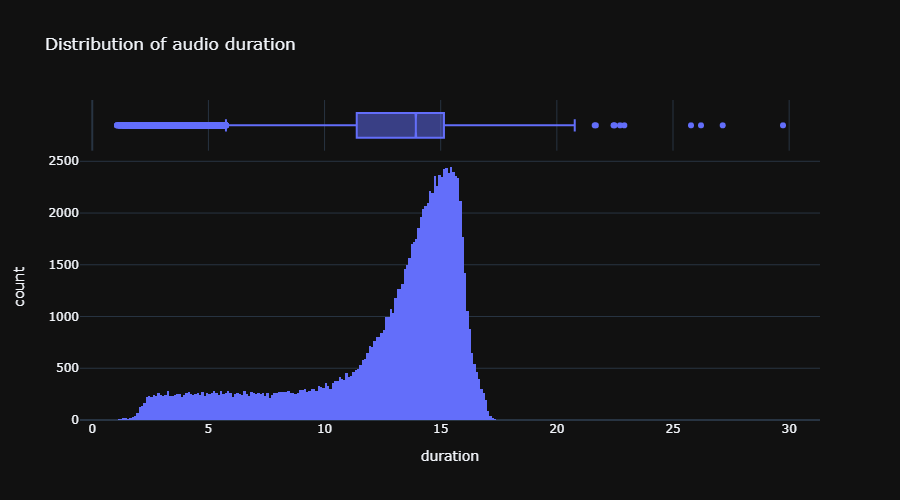

In [23]:
fig = px.histogram(data, x="duration", marginal="box", nbins=400, template='plotly_dark',
                  title='Distribution of audio duration')
Image(pio.to_image(fig, format='png', width=900))

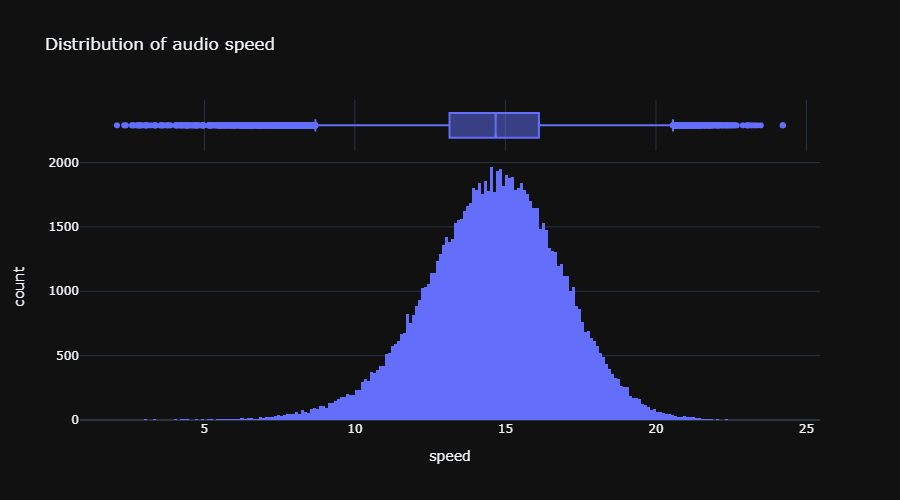

In [21]:
fig = px.histogram(data, x="speed", marginal="box", nbins=400, template='plotly_dark',
                  title='Distribution of audio speed')
Image(pio.to_image(fig, format='png', width=900))

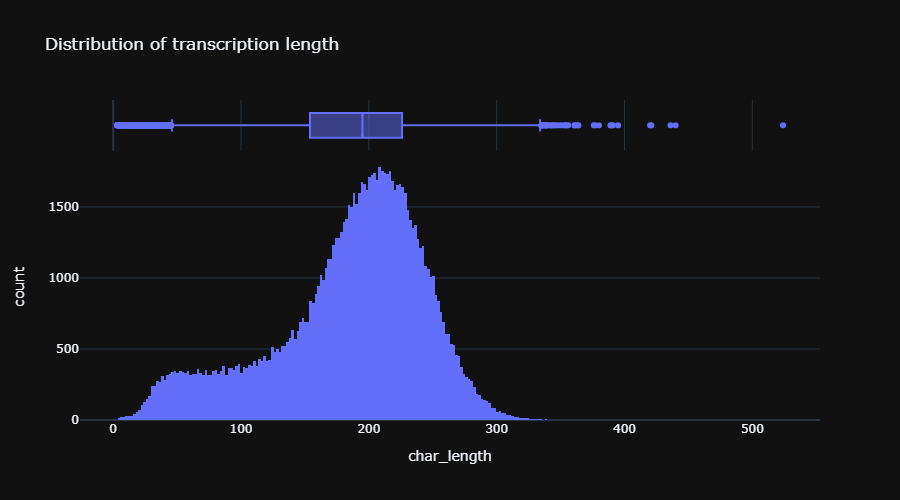

In [22]:
fig = px.histogram(data, x="char_length", marginal="box", nbins=400, template='plotly_dark',
                   title='Distribution of transcription length',)
Image(pio.to_image(fig, format='png', width=900))